# Wastewater injection from fracking became widespread in Oklahoma since 2010, and it may cause more earthquakes in the region.<br>
## 1. EDA of earthquakes overtime
## 2. Estimate the mean interearthquake times
## 3. Did earthquake frequency changed after fracking became widespread

In [3]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dc_stat_think as dcst

In [6]:
df = pd.read_csv('oklahoma_earthquakes_1950-2017.csv', skiprows=2, parse_dates=['time'])
display(df.head())
df.info()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,depthError,magError,magNst,status,locationSource,magSource,loc_name,loc_admin1,loc_admin2,loc_cc
0,1974-12-16 02:30:21.400,35.330,-97.480,10.0,2.6,ml,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,reviewed,m,tul,Moore,Oklahoma,Cleveland County,US
1,1975-09-13 01:25:02.800,34.139,-97.369,5.0,3.4,lg,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,reviewed,us,tul,Wilson,Oklahoma,Carter County,US
2,1975-10-12 02:58:11.200,34.816,-97.406,20.0,3.2,lg,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,reviewed,us,tul,Maysville,Oklahoma,Garvin County,US
3,1975-11-29 14:29:40.900,34.521,-97.347,5.0,3.5,lg,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,reviewed,us,slm,Wynnewood,Oklahoma,Garvin County,US
4,1976-04-16 18:59:44.200,36.107,-99.875,5.0,3.4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,reviewed,us,tul,Arnett,Oklahoma,Ellis County,US


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8978 entries, 0 to 8977
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   time             8978 non-null   datetime64[ns]
 1   latitude         8978 non-null   float64       
 2   longitude        8978 non-null   float64       
 3   depth            8978 non-null   float64       
 4   mag              8978 non-null   float64       
 5   magType          8970 non-null   object        
 6   nst              722 non-null    float64       
 7   gap              8128 non-null   float64       
 8   dmin             916 non-null    float64       
 9   rms              8318 non-null   float64       
 10  net              8978 non-null   object        
 11  id               8978 non-null   object        
 12  updated          8978 non-null   object        
 13  place            8978 non-null   object        
 14  type             8978 non-null   object 

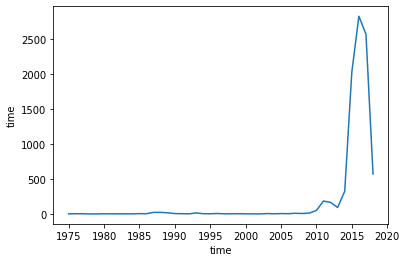

In [16]:
# EDA
# 1. Number of earthquakes by year
annual_eq = df.resample('Y', on='time')['time'].count()
_ = sns.lineplot(data=annual_eq)